---
### Problem Statement :
---

Uber has received some complaints from their customers facing problems related to ride cancellations by the driver and non-availability of cars for a specific route in the city.

The uneven supply-demand gap for cabs from City to Airport and vice-versa is causing a bad effect on customer relationships as well as Uber is losing out on its revenue.

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to tackle the situation.

---

In [ ]:
# Importing required libraries -

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset -

df = pd.read_csv('uber-data.csv', parse_dates=[4,5], dayfirst=True, na_values="NA")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [ ]:
# Shape of the dataset -

print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 6745
No. of cols: 6


In [ ]:
# Checking the data type -

df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Request id         int64         
 1   Pickup point       object        
 2   Driver id          float64       
 3   Status             object        
 4   Request timestamp  datetime64[ns]
 5   Drop timestamp     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


<ipython-input-6-e440671e25ac>:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(null_counts=False)


In [ ]:
# Checking for null values -

df.isnull().sum() / len(df) * 100

Request id            0.000000
Pickup point          0.000000
Driver id            39.288362
Status                0.000000
Request timestamp     0.000000
Drop timestamp       58.028169
dtype: float64

In [ ]:
# Checking for duplicate rows -

print("No. of duplicate rows: ", df.duplicated().sum())

No. of duplicate rows:  0


In [ ]:
df["RequestHour"] = df["Request timestamp"].dt.hour

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8


In [ ]:
#HW - Try to do similar for day of the week

In [ ]:
# Separate 5 different timeslots from the Hour - Dawn, Early Morning, Noon, Late Evening, Night -

df["TimeSlot"] = df["RequestHour"].apply(lambda x: "Dawn" if x<=4 else ("Early Morning"
                                                                        if x<=9 else ("Noon"
                                                                                      if x<=16 else ("Late Evening"
                                                                                                     if x<=21 else "Night"))))


In [ ]:
df.sample(20)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot
1809,5098,Airport,190.0,Trip Completed,2016-07-14 19:50:28,2016-07-14 20:27:04,19,Late Evening
5386,3635,Airport,NaN,No Cars Available,2016-07-13 18:58:18,NaT,18,Late Evening
3034,2077,City,54.0,Cancelled,2016-07-12 15:40:00,NaT,15,Noon
2761,1709,City,292.0,Trip Completed,2016-07-12 08:09:00,2016-07-12 09:11:00,8,Early Morning
4606,1376,Airport,NaN,No Cars Available,2016-07-12 00:40:00,NaT,0,Dawn
3762,2448,Airport,222.0,Cancelled,2016-07-12 20:26:00,NaT,20,Late Evening
2717,845,City,287.0,Trip Completed,2016-07-11 17:41:00,2016-07-11 18:57:00,17,Late Evening
3868,6057,Airport,247.0,Cancelled,2016-07-15 13:41:55,NaT,13,Noon
3689,98,City,205.0,Cancelled,2016-07-11 04:58:00,NaT,4,Dawn
6061,5197,Airport,NaN,No Cars Available,2016-07-14 20:50:35,NaT,20,Late Evening


In [ ]:
# Distinguish the Supply-Demand Gap by a new variable Cab Availability where Supply is when Trip is Completed, all else is Demand -

df["Cab Availability"] = df["Status"].apply(lambda x: "Available" if x=="Trip Completed" else "Not Available")

In [ ]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,RequestHour,TimeSlot,Cab Availability
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Noon,Available
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Late Evening,Available
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Early Morning,Available
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Late Evening,Available
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,Available


In [ ]:
df["Cab Availability"].value_counts(normalize = True)*100

Not Available    58.028169
Available        41.971831
Name: Cab Availability, dtype: float64

Text(0.5, 1.0, 'Frequency of Requests by Hour')

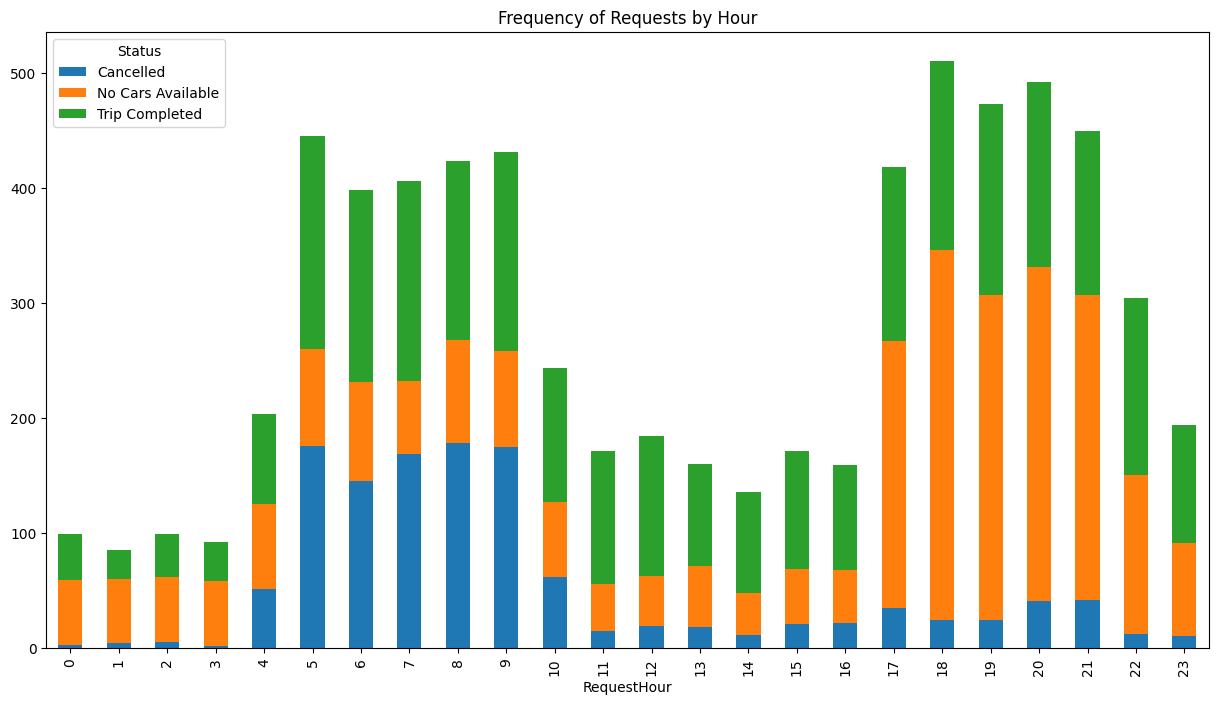

In [ ]:
# Frequency of Requests by Hour -

df.groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Frequency of Requests by Hour')

In [ ]:
#RCA
#Obs1: Peaks during 5-9 and 17-21 request hours
#obs2: During the 5-9 request hour bucket: among the two problems: cancellation and unavailable: cancellation is more
#obs3: During the 17-21 request hour bucket: high demand and low supply- unavailable cab is more as comapred to cancellation

Text(0, 0.5, '')

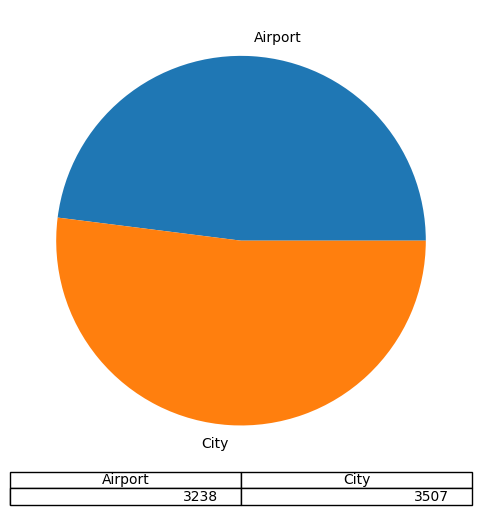

In [ ]:
# Types of Requests (city-airport or airport-city) -

df.groupby(['Pickup point']).size().plot(kind="pie", stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")

Text(0, 0.5, '')

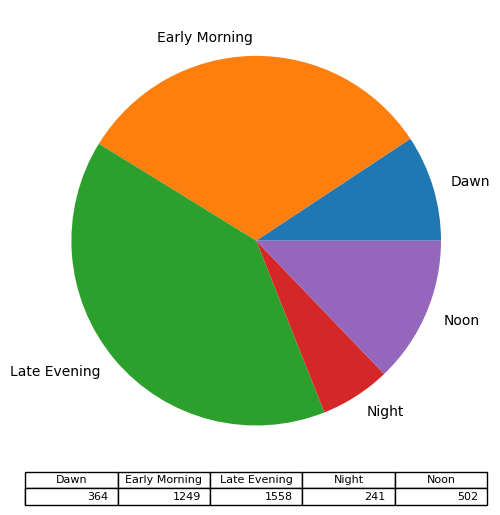

In [ ]:
# Distribution of Time Slots -

df[(df["Cab Availability"]=="Not Available")].groupby(['TimeSlot']).size().plot(kind="pie", stacked=True, figsize=(6, 6), table=True)
plt.ylabel("")

In [ ]:
#obs: majority of the problem is contributed by the late evening and early morning time slots

In [ ]:
#Airport --> City
#City --> Airport
#City --> City

Text(0.5, 1.0, 'Demand-Supply Gap from Airport to City')

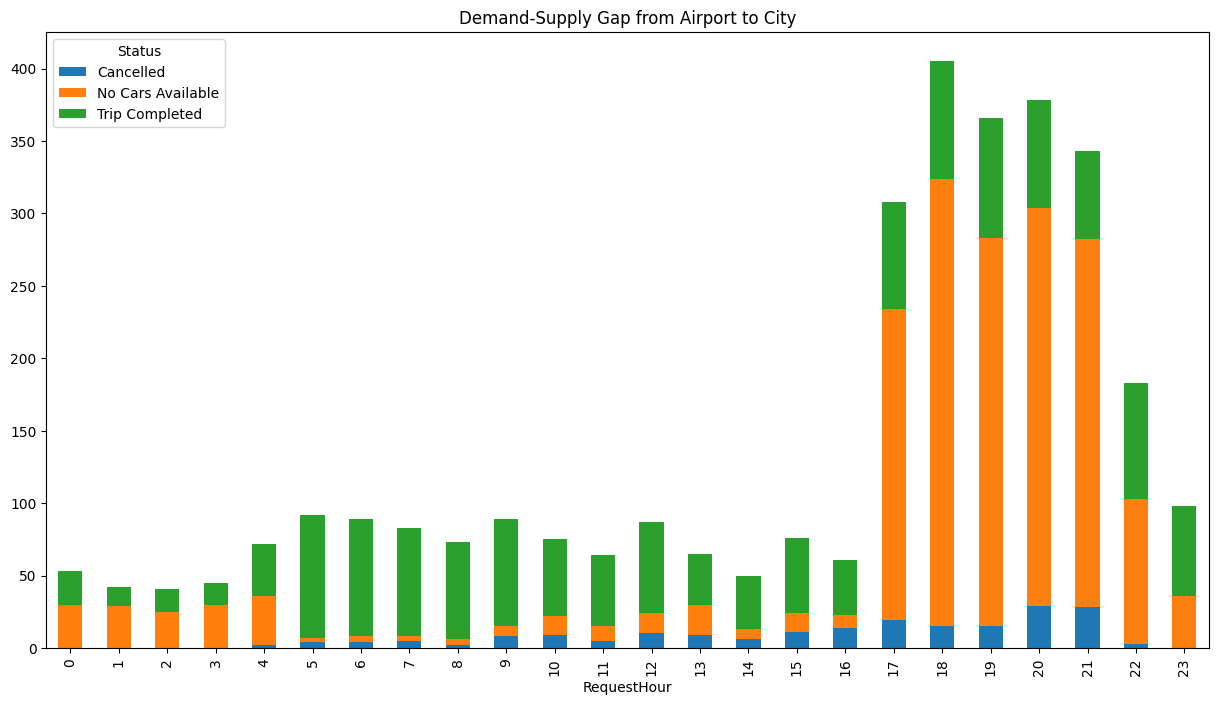

In [ ]:
# Demand-Supply Gap from Airport to City -

df[(df['Pickup point']=="Airport")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from Airport to City')

In [ ]:
#obs: majority of the unavailable cabs are coming during the late evening hours specifically when Airport is the pickup point

Text(0.5, 1.0, 'Demand-Supply Gap from City')

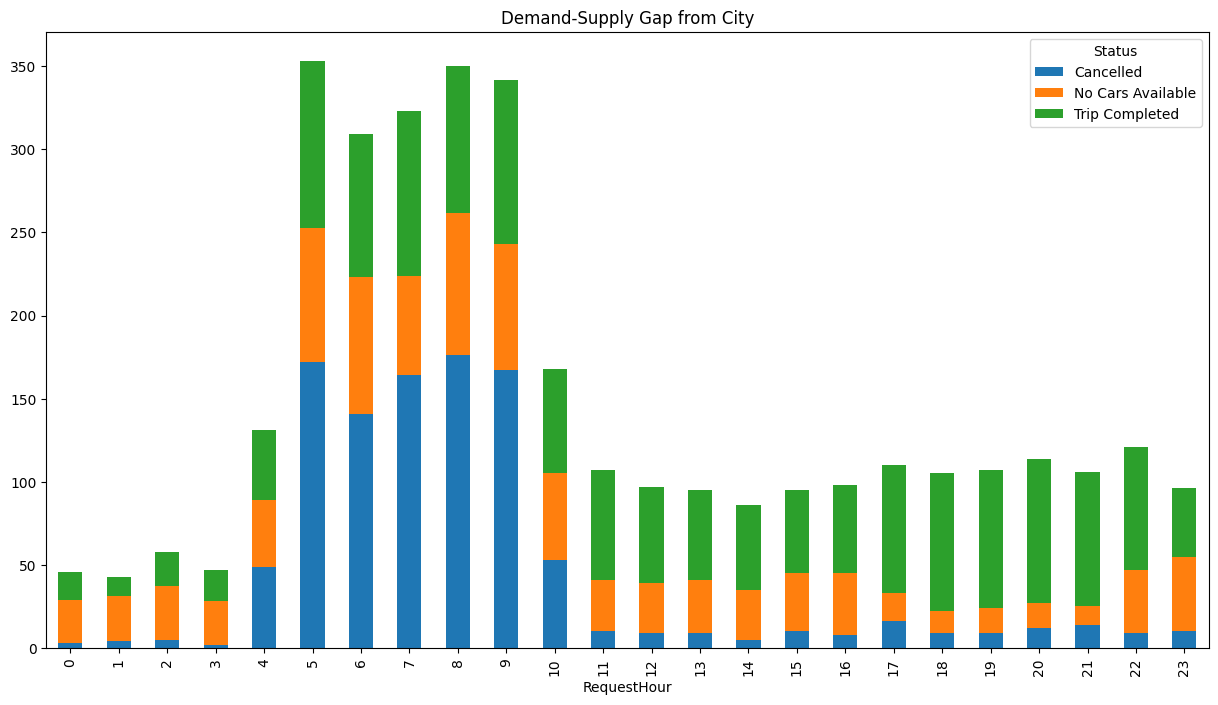

In [ ]:
# Demand-Supply Gap from Airport to City -

df[(df['Pickup point']=="City")].groupby(['RequestHour','Status']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Demand-Supply Gap from City')

In [ ]:
#obs: majority of the cancellations are coming during the morning hours specifically when City is the pickup point

In [ ]:
#Assume that --> we only have airport to city and city to airport